In [78]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import ursse.path_assistant as pa
shift = pa.PathAssistant('shift_02_28_2020')

In [79]:
df, n_revolutions = read_event_delays(shift.get_time_stamp_file_path('1el_001.ptu'))
t_delays = df.delay

In [80]:
gate = (61000, 67000)

In [81]:
n = 500
i = 200

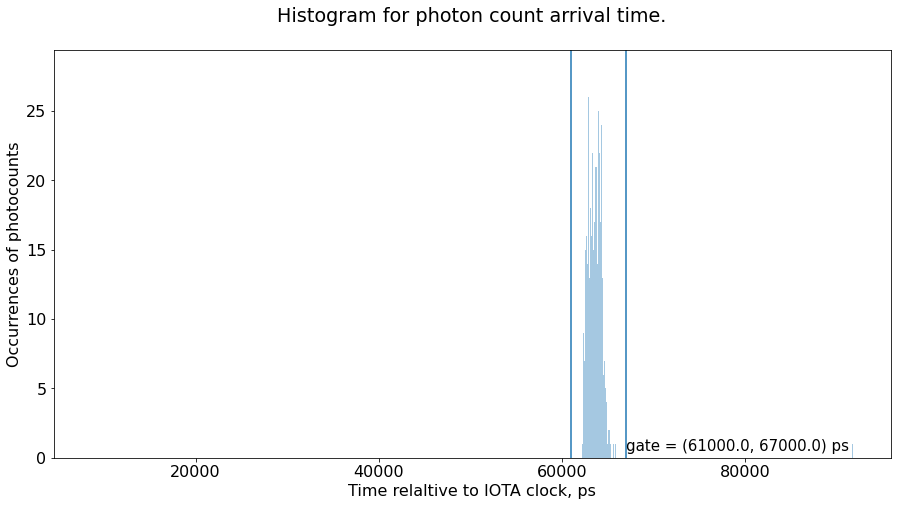

In [82]:
plot_arrival_time_hist(t_delays[i*n:(i+1)*n], gate=gate, bins=1000, yscale='linear')

In [83]:
n_revolutions*133e-9

19.955484787000003

In [84]:
from config_ursse import get_from_config
iota_period_sec = get_from_config("IOTA_revolution_period")
dt_sec = get_from_config("dt")
iota_period_au = iota_period_sec/dt_sec

In [85]:
from ursse.time_structure import get_bucket_gates, get_rate_in_gate_Hz,\
    reduce_df_to_one_gate, divide_df_into_time_bins, get_properties_in_time_bins

In [86]:
four_gates = get_bucket_gates(gate)
four_gates

[(61000.0, 67000.0),
 (94250.0, 100250.0),
 (127500.00000000001, 499.9999999999709),
 (27750.0, 33750.0)]

In [87]:
get_rate_in_gate_Hz(df, n_revolutions, gate)

24789.72599664762

In [88]:
df0 = reduce_df_to_one_gate(df, gate)
dt=0.1
df0 = divide_df_into_time_bins(df0, dt)
df0

/home/ilobach/ursse/analyzing_collected_data/shifts/shift_03_05_2020/../../../ursse/time_structure.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ilobach/ursse/analyzing_collected_data/shifts/shift_03_05_2020/../../../ursse/time_structure.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ilobach/ursse/analyzing_collected_data/shifts/shift_03_05_2020/../../../ursse/time_structure.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,revolution,delay,index_of_dt_bin,bin_time,time_sec
164,164,62915.0,0,0.0,0.000022
674,673,63208.0,0,0.0,0.000090
956,954,63113.0,0,0.0,0.000127
1444,1441,63969.0,0,0.0,0.000192
1623,1619,64572.0,0,0.0,0.000215
...,...,...,...,...,...
150459555,149621920,62959.0,198,19.8,19.899715
150460481,149622845,64042.0,198,19.8,19.899838
150460638,149623001,63831.0,198,19.8,19.899859
150461201,149623563,63038.0,198,19.8,19.899934


In [89]:
time_bins_df = get_properties_in_time_bins(df0)
time_bins_df

,time_sec,count,std
index_of_dt_bin,,,
0,0.0,2486,480.206228
1,0.1,2445,547.697641
2,0.2,2526,576.655915
3,0.3,2453,670.968889
4,0.4,2405,685.386575
...,...,...,...
194,19.4,2425,676.981778
195,19.5,2443,619.831142
196,19.6,2455,651.172813


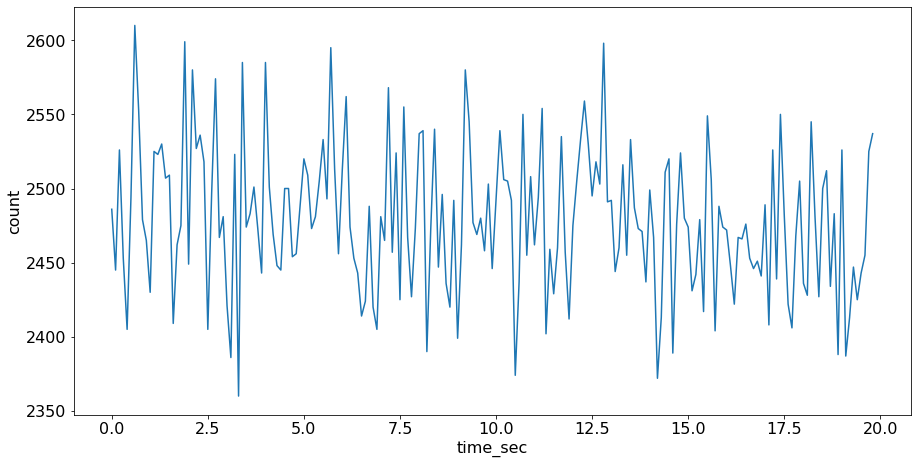

In [90]:
sns.lineplot(data=time_bins_df, x='time_sec', y='count')

In [91]:
import plotly.express as px
fig = px.scatter(x=time_bins_df['time_sec'], y=time_bins_df['std']**2)
fig.data[0].update(mode='markers+lines')
fig.show()

In [77]:
sns.scatterplot(data=df0[(df0['time_sec']>13.4) & ((df0['time_sec']<13.7))], x="revolution_time", y='delay')

ValueError: Could not interpret input 'revolution_time'

In [88]:
candidate_df = df0[(df0['time_sec']>13.4) & ((df0['time_sec']<13.55))]
candidate_df = candidate_df.reset_index(drop=True)

In [89]:
candidate_df['revolution'] = candidate_df['revolution']-candidate_df['revolution'][0]
candidate_df['time_sec'] = candidate_df['time_sec']-candidate_df['time_sec'][0]
candidate_df['index_of_dt_bin'] = candidate_df['index_of_dt_bin']-candidate_df['index_of_dt_bin'][0]
candidate_df['delay'] = candidate_df['delay']-candidate_df['delay'].mean()

In [90]:
candidate_df

,revolution,delay,index_of_dt_bin,time_sec,revolution_time
0,0,-1206.373692,0,0.00,13.405091
1,244,-443.373692,0,0.00,13.405123
2,334,-22.373692,0,0.00,13.405135
3,423,299.626308,0,0.00,13.405147
4,891,1584.626308,0,0.00,13.405210
...,...,...,...,...,...
3530,1088116,22.626308,28,0.14,13.549810
3531,1088126,955.626308,28,0.14,13.549812
3532,1088514,756.626308,28,0.14,13.549863
3533,1088535,506.626308,28,0.14,13.549866


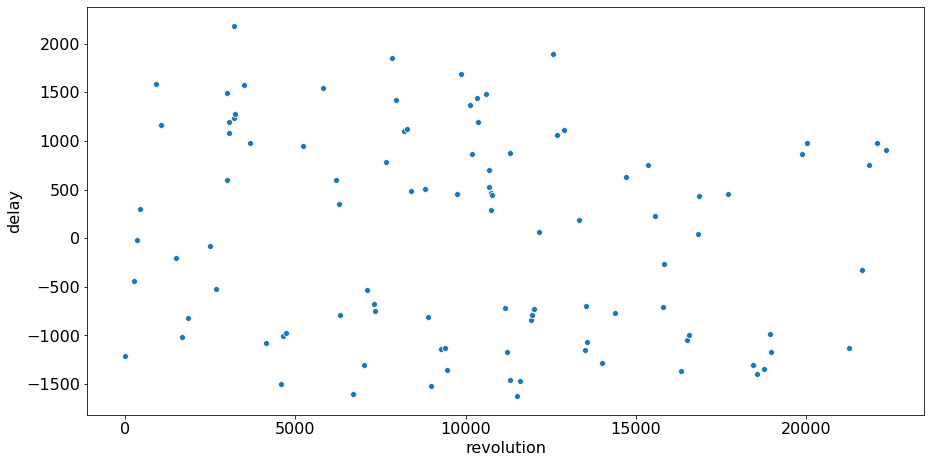

In [91]:
sns.scatterplot(data=candidate_df.iloc[:100,:], x="revolution", y='delay')

In [93]:
len(candidate_df.index)

3535

In [94]:
a0 = 0

In [95]:
from scipy.optimize import curve_fit
t0=2372
cand_df_slice = candidate_df.iloc[:100, :]
x = cand_df_slice["revolution"].values
y = cand_df_slice['delay'].values
def f(t, A, B, T):
    return np.exp(-a0*t)*(A*np.cos(2*np.pi/T*t)+B*np.sin(2*np.pi/T*t))
def f_damp(t, a0, A, B, T):
    return np.exp(-a0*t)*(A*np.cos(2*np.pi/T*t)+B*np.sin(2*np.pi/T*t))
p0 = (np.std(y), np.std(y), t0)
popt, pcov = curve_fit(f, x, y, p0=p0)
a, b, t = popt
x_fit = np.linspace(x[0],x[-1],10000)
y_fit = f_damp(x_fit, a0, a, b, t)
amp = np.sqrt(a**2+b**2)
amp, t, a0

(1370.4748475814301, 2361.2569740191693, 0)

In [96]:
b

899.0753770336801

In [99]:
a0 = 0

cand_df_slice = candidate_df#[(candidate_df['revolution']<7e6)]

x = cand_df_slice["revolution"].values
y = cand_df_slice['delay'].values
x_fit = np.linspace(x[0],x[-1],10000)
y_fit = f_damp(x_fit, a0, a, b, t)
fig = px.scatter(cand_df_slice, x="revolution", y="delay")
fig.add_scatter(x=x_fit, y=y_fit, mode='lines')
fig.show()

In [589]:
a0/iota_period_sec

1.8796992481203005

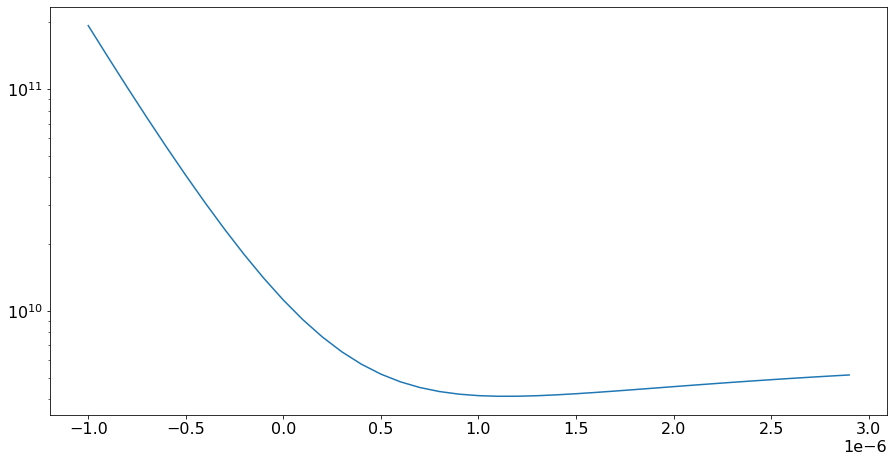

In [584]:
a0s = np.arange(-1e-6, 3e-6, 1e-7)
disc = [np.sum((y-f_damp(x, a0_, a, b, t))**2) for a0_ in a0s]
plt.plot(a0s, disc)
plt.yscale('log')

In [103]:
nbins=30
y_max = df0.groupby('index_of_dt_bin').delay.apply(lambda x: max(np.histogram(np.asarray(x), bins=nbins, range=gate)[0])).max()

In [104]:
bins = np.histogram([], bins=nbins, range=gate)[1]
bin_centers = (bins[1:]+bins[:-1])/2

In [105]:
hists = (df0.groupby('index_of_dt_bin').delay.apply(lambda x: np.histogram(np.asarray(x), bins=nbins, range=gate)[0])).to_list()

In [106]:
n_dt_bins = int(n_revolutions/revolutions_per_dt)

In [107]:
all_bin_centers = np.tile(bin_centers, n_dt_bins)
all_hists = np.concatenate(hists)[:nbins*n_dt_bins]
all_indexes = np.ravel(np.ones(bin_centers.shape)*(np.arange(n_dt_bins)[:, None])).astype(int)
hist_df = pd.DataFrame({'bin_center': all_bin_centers,
                        'counts': all_hists,
                        'time_index':all_indexes})
hist_df['time_sec'] = dt*hist_df['time_index']
y_max = hist_df['counts'].max()

In [108]:
hist_df

,bin_center,counts,time_index,time_sec
0,61100.0,0,0,0.00
1,61300.0,0,0,0.00
2,61500.0,0,0,0.00
3,61700.0,0,0,0.00
4,61900.0,0,0,0.00
...,...,...,...,...
119725,66100.0,0,3990,19.95
119726,66300.0,0,3990,19.95
119727,66500.0,0,3990,19.95
119728,66700.0,0,3990,19.95


In [109]:
fig = px.bar(hist_df, x="bin_center", y="counts",
  animation_frame="time_index", range_x=gate, range_y=[0, 1.1*y_max], labels={'x':'time, ps', 'y':'count'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = int(dt*1000)
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0
fig.show()

KeyboardInterrupt: 